<a href="https://colab.research.google.com/github/2303A52331-coder/EX_AI_LAB/blob/main/LAB_EXAM2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

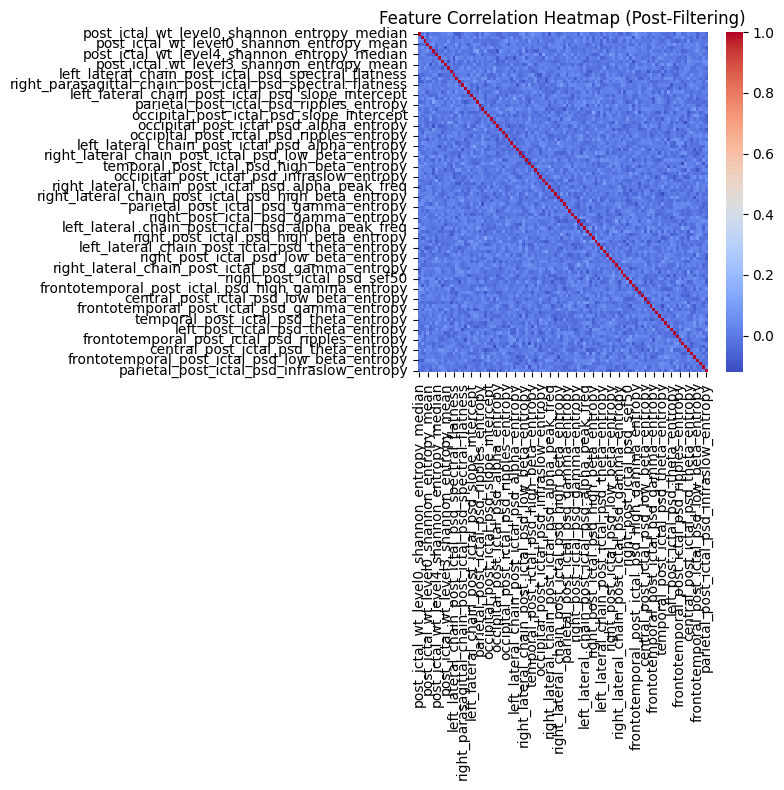


--- Results for: Random Forest Classifier (Bagging) ---
Accuracy: 0.5320
Precision: 0.5283
Recall: 0.4553
F1-Score: 0.4891
AUC-ROC: 0.5115


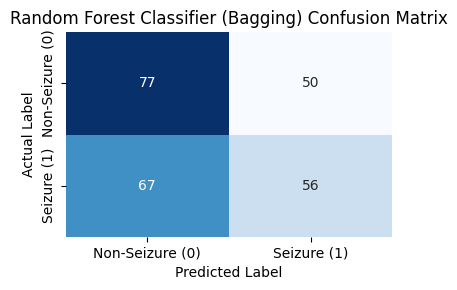

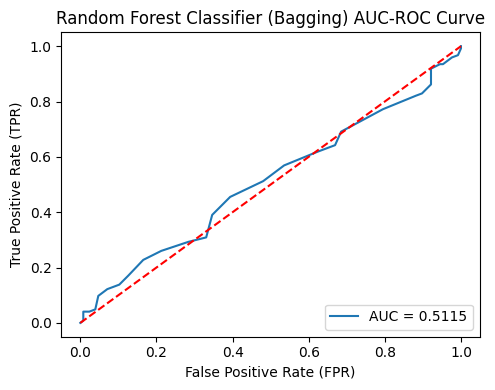


--- XGBoost Classifier (Boosting) Placeholder ---
This model cannot be run as the XGBoost library is unavailable.

--- Deep Learning (FNN/MLP) Placeholder ---
This step is conceptual as necessary deep learning frameworks (TensorFlow/Keras) are not available.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve
)


import warnings
warnings.filterwarnings('ignore')


try:

    df_postictal_features = pd.read_csv('postictal_feature_list.csv', header=None, names=['feature_name'])
    df_seizure_features = pd.read_csv('seizure_feature_list.csv', header=None, names=['feature_name'])


    all_features = pd.concat([df_postictal_features, df_seizure_features])['feature_name'].tolist()


    synthetic_features = all_features[:100]
    N_SAMPLES = 1000


    np.random.seed(42)
    data = {}
    for feature in synthetic_features:
        data[feature] = np.random.rand(N_SAMPLES) * 100

        data[feature][np.random.choice(N_SAMPLES, int(N_SAMPLES * 0.05), replace=False)] = np.nan


    data['is_seizure'] = np.random.randint(0, 2, N_SAMPLES)

    df = pd.DataFrame(data)

    TARGET_COL = 'is_seizure'
    X = df.drop(columns=[TARGET_COL])
    y = df[TARGET_COL]

except Exception as e:
    print(f"Error during data setup: {e}")




X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)



def preprocess_data(X_train, X_test):
    """Handles Median Imputation (Null Value Handling) and Z-Score Standardization (Normalization)."""


    imputer = X_train.median()
    X_train_imputed = X_train.fillna(imputer)
    X_test_imputed = X_test.fillna(imputer)


    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_imputed)
    X_test_scaled = scaler.transform(X_test_imputed)


    X_train_processed = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
    X_test_processed = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

    return X_train_processed, X_test_processed

X_train_proc, X_test_proc = preprocess_data(X_train, X_test)





corr_matrix = X_train_proc.corr().abs()

UPPER = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
TO_DROP_CORR = [column for column in UPPER.columns if any(UPPER[column] > 0.85)]


X_train_final = X_train_proc.drop(columns=TO_DROP_CORR)
X_test_final = X_test_proc.drop(columns=TO_DROP_CORR)







X_train_final_balanced, y_train_final_balanced = X_train_final, y_train



plt.figure(figsize=(8, 8))
sns.heatmap(X_train_final.corr(), cmap='coolwarm', cbar=True, annot=False)
plt.title('Feature Correlation Heatmap (Post-Filtering)')
plt.tight_layout()
plt.show()




def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    """Trains a model and calculates/plots key classification metrics."""
    print(f"\n--- Results for: {model_name} ---")


    model.fit(X_train, y_train)


    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]


    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "AUC-ROC": roc_auc_score(y_test, y_proba)
    }

    for name, value in metrics.items():
        print(f"{name}: {value:.4f}")


    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Non-Seizure (0)', 'Seizure (1)'],
                yticklabels=['Non-Seizure (0)', 'Seizure (1)'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()


    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(5, 4))
    plt.plot(fpr, tpr, label=f'AUC = {metrics["AUC-ROC"]:.4f}')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.title(f'{model_name} AUC-ROC Curve')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()



rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
evaluate_model(rf_model, X_train_final_balanced, y_train_final_balanced, X_test_final, y_test, "Random Forest Classifier (Bagging)")


print("\n--- XGBoost Classifier (Boosting) Placeholder ---")
print("This model cannot be run as the XGBoost library is unavailable.")


print("\n--- Deep Learning (FNN/MLP) Placeholder ---")
print("This step is conceptual as necessary deep learning frameworks (TensorFlow/Keras) are not available.")